In [5]:
import pandas as pd

# Load XML dataset
file_path = r"C:/7th sem/FML/tutorials/Loan prediction dataset/train_u6lujuX_CVtuZ9i.csv"

df = pd.read_csv(file_path)

# Quick look
print(df.head())
print(df.info())
print(df.isnull().sum())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [16]:
from sklearn.preprocessing import LabelEncoder

# Fill missing values
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# Encode categorical variables
cat_cols = X.select_dtypes(include=["object"]).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [17]:
from sklearn.model_selection import train_test_split

# Drop Loan_ID column before splitting
X = df.drop(["Loan_ID", "Loan_Status"], axis=1)
y = df["Loan_Status"].map({"Y":1, "N":0})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [18]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predicted probabilities
y_prob = log_reg.predict_proba(X_test)[:,1]
y_pred = log_reg.predict(X_test)


c:\Users\Lopa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

rf_prob = rf.predict_proba(X_test)[:,1]
gb_prob = gb.predict_proba(X_test)[:,1]


Confusion Matrix:
 [[22 16]
 [ 1 84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123

AUC: 0.7928792569659443


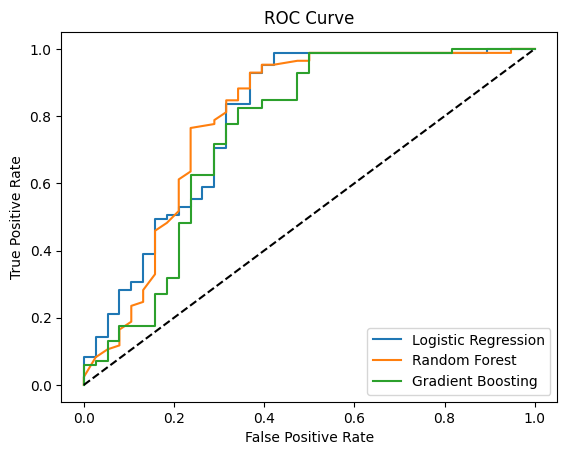

In [20]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt

# Logistic Regression
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="Logistic Regression")

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
plt.plot(fpr_rf, tpr_rf, label="Random Forest")

fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_prob)
plt.plot(fpr_gb, tpr_gb, label="Gradient Boosting")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [21]:
df_results = X_test.copy()
df_results["Actual"] = y_test
df_results["Default_Prob"] = y_prob
df_results = df_results.sort_values(by="Default_Prob", ascending=False)

print(df_results.head(10))  # top 10 risky customers


     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
540       0        1           1          0              0             4608   
575       1        1           2          0              0             3159   
219       0        1           2          0              0             4283   
184       0        1           0          0              0             3625   
604       0        1           1          0              0            12000   
539       1        1           3          0              0             6417   
144       1        1           2          0              0            11757   
328       0        1           0          0              0             4333   
559       0        1           0          0              0             4180   
602       1        1           3          0              0             5703   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
540             2845.0       140.0             180.0      